# Chicago Parks

## Description

Origin: Chicago data portal (https://data.cityofchicago.org/)

Last updated: xx/xx/xxxx

## Packages (Python)

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 25.9 MB/s 
     |████████████████████████████████| 16.7 MB 53.2 MB/s 
     |████████████████████████████████| 6.3 MB 59.8 MB/s 


In [ ]:
!pip install geojson

In [ ]:
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go

import geopandas as gpd
import geopy as gp
import shapely
import geojson
#import rtree
#import pygeos
#import fiona

In [ ]:
# Preprocessing files
from preprocessing import *

## Chicago Polygon 

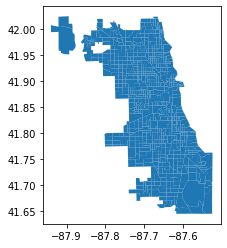

In [ ]:
# Reading file that must be uploaded

chicago = gpd.read_file('chicago.shp')
chicago.plot()

## Data processing

In [ ]:
url = 'https://data.cityofchicago.org/resource/2eaw-bdhe.json'
parks_raw = pd.read_json(url)

In [ ]:
parks_raw.head()

,park_name,bowling_green,gymnastic_centers,:@computed_region_43wa_7qmu,band_shell,wheelchair_accessible_ball_fields,boat_slips,volleyball_sand,park_class,alfred_caldwell_lily_pond,...,playground,label,fitness_courses,track,garden,golf_driving_range,archery_range,:@computed_region_vrxf_vc4k,volleyball,croquet
0,MCKEON (JOSEPH),0,0,48.0,0,0,0,0,MINI-PARK,0,...,0,McKeon,0,0,0,0,0,58.0,0,0
1,OHIO,0,0,23.0,0,0,0,0,MINI-PARK,0,...,1,Ohio,0,0,0,0,0,26.0,0,0
2,ALTGELD (JOHN),0,0,23.0,0,0,0,0,COMMUNITY PARK,0,...,1,Altgeld,0,0,0,0,0,28.0,0,0
3,PARK NO. 468,0,0,15.0,0,0,0,0,UNIMPROVED PARK,0,...,0,Park No. 468,0,0,0,0,0,60.0,0,0
4,RAINEY (EDWARD),0,0,30.0,0,0,0,0,REGIONAL PARK,0,...,1,Rainey,0,0,0,0,0,69.0,1,0


In [ ]:
parks_raw["location"][0]

{'human_address': '{"address": "600 W 36TH ST", "city": "", "state": "", "zip": "60609"}',
 'latitude': '41.82903552510654',
 'longitude': '-87.64121494764093',
 'needs_recoding': False}

In [ ]:
parks_located = pd.DataFrame()
parks_located = extract_location(parks)

In [ ]:
parks_located.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 83 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   park_name                          581 non-null    object 
 1   bowling_green                      581 non-null    int64  
 2   gymnastic_centers                  581 non-null    int64  
 3   :@computed_region_43wa_7qmu        577 non-null    float64
 4   band_shell                         581 non-null    int64  
 5   wheelchair_accessible_ball_fields  581 non-null    int64  
 6   boat_slips                         581 non-null    int64  
 7   volleyball_sand                    581 non-null    int64  
 8   park_class                         581 non-null    object 
 9   alfred_caldwell_lily_pond          581 non-null    int64  
 10  location                           580 non-null    object 
 11  lagoon                             581 non-null    int64  

In [ ]:
parks_located.describe()

,bowling_green,gymnastic_centers,:@computed_region_43wa_7qmu,band_shell,wheelchair_accessible_ball_fields,boat_slips,volleyball_sand,alfred_caldwell_lily_pond,lagoon,casting_area,...,boxing_center,playground,fitness_courses,track,garden,golf_driving_range,archery_range,:@computed_region_vrxf_vc4k,volleyball,croquet
count,581.000000,581.000000,577.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,...,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,577.000000,581.000000,581.000000
mean,0.003442,0.013769,26.131716,0.001721,0.003442,0.166954,0.058520,0.001721,0.030981,0.020654,...,0.017212,0.662651,0.005164,0.046472,0.032702,0.005164,0.001721,37.076256,0.036145,0.003442
std,0.082974,0.116633,14.537905,0.041487,0.058621,3.737694,0.255998,0.041487,0.209442,0.142346,...,0.130172,0.807166,0.071734,0.210686,0.205017,0.071734,0.041487,22.088075,0.195823,0.058621
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
50%,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000
75%,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000
max,2.000000,1.000000,50.000000,1.000000,1.000000,90.000000,2.000000,1.000000,3.000000,1.000000,...,1.000000,10.000000,1.000000,1.000000,2.000000,1.000000,1.000000,77.000000,2.000000,1.000000


In [ ]:
parks_located.isnull().sum()

park_name                      0
bowling_green                  0
gymnastic_centers              0
:@computed_region_43wa_7qmu    4
band_shell                     0
                              ..
:@computed_region_vrxf_vc4k    4
volleyball                     0
croquet                        0
latitude                       4
longitude                      4
Length: 83, dtype: int64

In [ ]:
location_null = parks_located['location'].isnull().sum()
print(location_null)

1


Since there was a single data point without location we chose to drop it

In [ ]:
parks_located = parks_located.dropna()

## Geoencoding

In [ ]:
parks_geo = gpd.GeoDataFrame(parks_located, geometry = gpd.points_from_xy(parks_located.longitude, parks_located.latitude))

## Plots

Text(0.5, 1.0, 'Parks in Chicago')

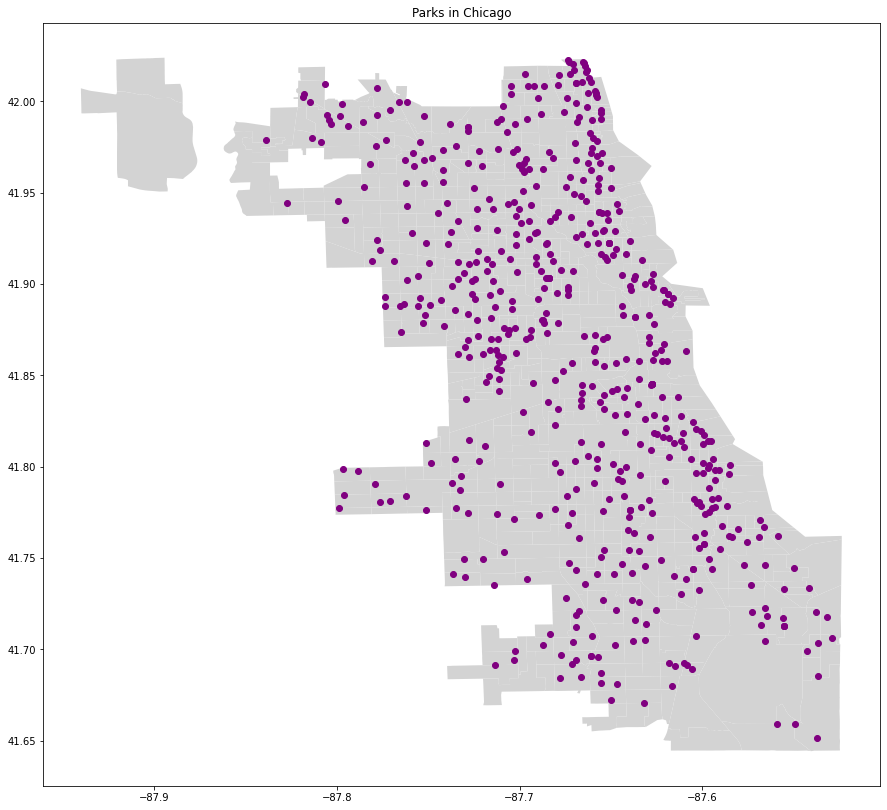

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
parks_geo.plot(ax = ax, color = 'purple')
ax.set_title('Parks in Chicago')